In [1]:
import hashlib
import requests
import datetime
import pandas as pd

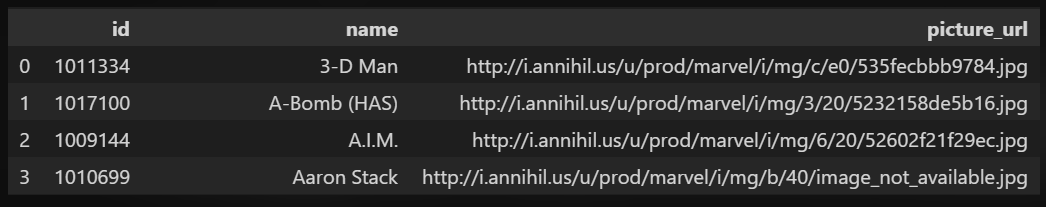

In [2]:
def hash_params(timestamp,priv_key,pub_key):
    """ Marvel API requires server side API calls to include
    md5 hash of timestamp + public key + private key """

    hash_md5 = hashlib.md5()
    hash_md5.update(f'{timestamp}{priv_key}{pub_key}'.encode('utf-8'))
    hashed_params = hash_md5.hexdigest()

    return hashed_params

In [6]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')

pub_key = '54b799a4f19a34978bd67cc4f7b33b30'
priv_key = 'aa2e900db94cbe91cce6def8338286552a99ebf5'

params = {'ts': timestamp, 
        'apikey': pub_key, 
        'hash': hash_params(timestamp,priv_key,pub_key),
        'nameStartsWith':"J",
        # 'offset':,
        # 'limit': 100,
        
        };

url = 'http://gateway.marvel.com/v1/public/characters'

res = requests.get(url,params=params)
res.json()

{'code': 200,
 'status': 'Ok',
 'copyright': '© 2024 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2024 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2024 MARVEL</a>',
 'etag': '47d1f3d04da6603f8324142dd782a150ae9d09fc',
 'data': {'offset': 0,
  'limit': 20,
  'total': 44,
  'count': 20,
  'results': [{'id': 1009372,
    'name': 'J. Jonah Jameson',
    'description': '',
    'modified': '2016-08-05T14:11:58-0400',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/d0/5269582835689',
     'extension': 'jpg'},
    'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009372',
    'comics': {'available': 282,
     'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009372/comics',
     'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/77066',
       'name': 'Absolute Carnage: Miles Morales (2019) #3'},
      {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/30885',
    

In [37]:
from IPython.display import HTML

url = 'http://gateway.marvel.com/v1/public/characters'

# Solicitar datos a la API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    results = data.get('data', {}).get('results', [])
    
    
    marvel = pd.DataFrame([{
        'id': i['id'],
        'name': i['name'],
        'picture': f"<img src='{i['thumbnail']['path']}.{i['thumbnail']['extension']}' width='100' />"
    } for i in results])
    
    # Renderizar como HTML con imágenes
    def render_mixed_dataframe(dataframe):
        return HTML(dataframe.to_html(escape=False))
    
    display(render_mixed_dataframe(marvel))
else:
    print(f"Error: {response.status_code} - {response.text}")



,id,name,picture
0,1009372,J. Jonah Jameson,
1,1010736,Jack Flag,
2,1010786,Jack Murdock,
3,1010766,Jack O' Lantern,
4,1011251,Jack Power,
5,1011288,Jackal,
6,1011259,Jackpot,
7,1010775,James Buchanan Barnes,
8,1010777,James Howlett,
9,1011343,Jamie Braddock,
